In [1]:
from functions import *
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
data5 = load_data("bianconi-barabasi_10000_5").fillna(method="ffill")

Loading dataset: Completed!


In [3]:
data10 = load_data("bianconi-barabasi_10000_10").fillna(method="ffill")

Loading dataset: Completed!


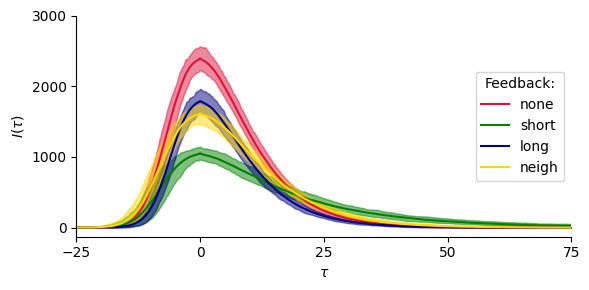

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(6,3))
mycolors = ["crimson","g","navy","gold"]

none = mean_quantiles(offset_at_peak(data10.xs(("none","none","none"),level=[0,1,2]).xs("I",axis=1,level="compartment")), CI=0.9)
sliced = data10.xs(("soften","fixed"),level=("reaction","fear")).xs("I",axis=1,level="compartment")
short = mean_quantiles(offset_at_peak(sliced.xs("short",level="feedback")), CI=0.9)
long = mean_quantiles(offset_at_peak(sliced.xs("long",level="feedback")), CI=0.9)
neighbours = mean_quantiles(offset_at_peak(sliced.xs("neighbours",level="feedback")), CI=0.9)
ax.plot(none["mean"], color=mycolors[0], label="none")
ax.fill_between(none.index, none["low"], none["high"], color=mycolors[0], alpha=0.5)
ax.plot(short["mean"], color=mycolors[1], label="short")
ax.fill_between(short.index, short["low"], short["high"], color=mycolors[1], alpha=0.5)
ax.plot(long["mean"], color=mycolors[2], label="long")
ax.fill_between(long.index, long["low"], long["high"], color=mycolors[2], alpha=0.5)
ax.plot(neighbours["mean"], color=mycolors[3], label="neigh")
ax.fill_between(neighbours.index, neighbours["low"], neighbours["high"], color=mycolors[3], alpha=0.5)

ax.set_xlabel(r"$\tau$")
ax.set_xlim([-25,75])
ax.set_xticks(np.linspace(-25,75,5))
ax.spines[["top","right"]].set_visible(False)
ax.set_ylabel(r"$I(\tau)$")
ax.set_yticks(np.linspace(0,3000,4))
ax.legend(loc="center right", title="Feedback:")

fig.tight_layout()
fig.savefig("plots/feedback/neighbour_evolution.png")
fig.savefig("plots/feedback/neighbour_evolution.pdf")

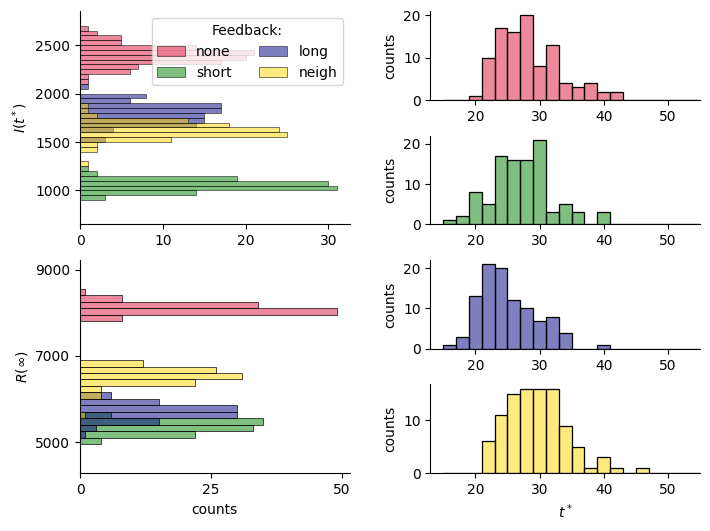

In [85]:
fig = plt.figure(figsize=(8,6))
mycolors = ["crimson","g","navy","gold"]

Caxs = np.array([
    plt.subplot2grid((4,2),(0,0),rowspan=2),
    plt.subplot2grid((4,2),(2,0),rowspan=2)
])
bins = [np.linspace(750,2750,41),np.linspace(4500,9000,31)]
for j,comp in enumerate(["I","R"]):
    none = data10.xs(("none","none","none"),level=(0,1,2)).xs(comp,axis=1,level="compartment")
    sliced = data10.xs(("soften","fixed"),level=("reaction","fear")).xs(comp,axis=1,level="compartment")
    short = sliced.xs("short",level="feedback")
    long = sliced.xs("long",level="feedback")
    neighbours = sliced.xs("neighbours",level="feedback")
    if comp == "I":
        sb.histplot(y=none.apply(np.max), bins=bins[j], color=mycolors[0], alpha=0.5, label="none", ax=Caxs[j])
        sb.histplot(y=short.apply(np.max), bins=bins[j], color=mycolors[1], alpha=0.5, label="short", ax=Caxs[j])
        sb.histplot(y=long.apply(np.max), bins=bins[j], color=mycolors[2], alpha=0.5, label="long", ax=Caxs[j])
        sb.histplot(y=neighbours.apply(np.max), bins=bins[j], color=mycolors[3], alpha=0.5, label="neigh", ax=Caxs[j])
    elif comp == "R":
        sb.histplot(y=none.iloc[-1], bins=bins[j], color=mycolors[0], alpha=0.5, label="none", ax=Caxs[j])
        sb.histplot(y=short.iloc[-1], bins=bins[j], color=mycolors[1], alpha=0.5, label="short", ax=Caxs[j])
        sb.histplot(y=long.iloc[-1], bins=bins[j], color=mycolors[2], alpha=0.5, label="long", ax=Caxs[j])
        sb.histplot(y=neighbours.iloc[-1], bins=bins[j], color=mycolors[3], alpha=0.5, label="neigh", ax=Caxs[j])

Caxs[0].set_xlabel(None)
Caxs[1].set_xlabel("counts")
Caxs[0].set_ylabel(r"$I(t^*)$")
Caxs[1].set_ylabel(r"$R(\infty)$")
Caxs[0].set_xticks(np.linspace(0,30,4))
Caxs[1].set_xticks(np.linspace(0,50,3))
Caxs[0].set_yticks(np.linspace(1000,2500,4))
Caxs[1].set_yticks(np.linspace(5000,9000,3))
for ax in Caxs:
    ax.spines[["top","right"]].set_visible(False)


taxs3 = plt.subplot2grid((4,2),(3,1))
taxs = np.array([
    plt.subplot2grid((4,2),(0,1),sharex=taxs3),
    plt.subplot2grid((4,2),(1,1),sharex=taxs3),
    plt.subplot2grid((4,2),(2,1),sharex=taxs3),
    taxs3
])
bins = np.linspace(15,55,21)
none = df.xs(("none","none","none"),level=[0,1,2]).xs("I",axis=1,level="compartment")
sliced = df.xs(("soften","fixed"),level=("reaction","fear")).xs("I",axis=1,level="compartment")
short = sliced.xs("short",level="feedback")
long = sliced.xs("long",level="feedback")
neighbours = sliced.xs("neighbours",level="feedback")
sb.histplot(x=none.index[none.apply(np.argmax).to_numpy()], bins=bins, color=mycolors[0], alpha=0.5, label="none", ax=taxs[0])
sb.histplot(x=short.index[short.apply(np.argmax).to_numpy()], bins=bins, color=mycolors[1], alpha=0.5, label="short", ax=taxs[1])
sb.histplot(x=long.index[long.apply(np.argmax).to_numpy()], bins=bins, color=mycolors[2], alpha=0.5, label="long", ax=taxs[2])
sb.histplot(x=neighbours.index[neighbours.apply(np.argmax).to_numpy()], bins=bins, color=mycolors[3], alpha=0.5, label="neigh", ax=taxs[3])

for ax in taxs[:-1]:
    ax.set_xlabel(None)
    for tk in ax.get_yticklabels():
        tk.set_visible(True)
for ax in taxs:
    ax.set_ylabel("counts")
    ax.spines[["top","right"]].set_visible(False)
taxs3.set_xlabel(r"$t^*$")
taxs3.set_xticks(np.linspace(20,50,4))
taxs3.set_xlim([13,55])
Caxs[0].legend(loc="upper right", title="Feedback:", ncols=2)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig.savefig("plots/feedback/neighbour_metrics.png")
fig.savefig("plots/feedback/neighbour_metrics.pdf")

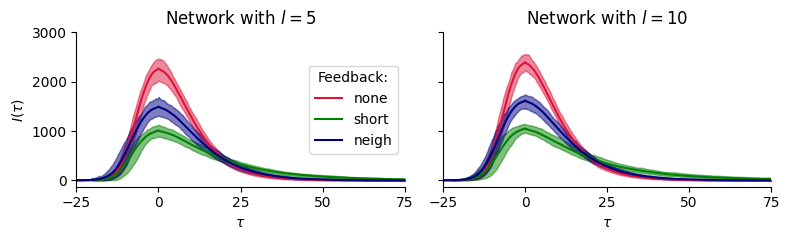

In [20]:
data = [data5,data10]

fig, axs = plt.subplots(1, 2, figsize=(8,2.5), sharey=True)
mycolors = ["crimson","g","navy"]
for i,df in enumerate(data):
    none = mean_quantiles(offset_at_peak(df.xs(("none","none","none"),level=[0,1,2]).xs("I",axis=1,level="compartment")), CI=0.9)
    sliced = df.xs(("soften","fixed"),level=("reaction","fear")).xs("I",axis=1,level="compartment")
    short = mean_quantiles(offset_at_peak(sliced.xs("short",level="feedback")), CI=0.9)
    neighbours = mean_quantiles(offset_at_peak(sliced.xs("neighbours",level="feedback")), CI=0.9)
    axs[i].plot(none["mean"], color=mycolors[0], label="none")
    axs[i].fill_between(none.index, none["low"], none["high"], color=mycolors[0], alpha=0.5)
    axs[i].plot(short["mean"], color=mycolors[1], label="short")
    axs[i].fill_between(short.index, short["low"], short["high"], color=mycolors[1], alpha=0.5)
    axs[i].plot(neighbours["mean"], color=mycolors[2], label="neigh")
    axs[i].fill_between(neighbours.index, neighbours["low"], neighbours["high"], color=mycolors[2], alpha=0.5)


for ax in axs:
    ax.set_xlabel(r"$\tau$")
    ax.set_xlim([-25,75])
    ax.set_xticks(np.linspace(-25,75,5))
    ax.spines[["top","right"]].set_visible(False)
axs[0].set_title(r"Network with $l=5$")
axs[1].set_title(r"Network with $l=10$")
axs[0].set_ylabel(r"$I(\tau)$")
axs[0].set_yticks(np.linspace(0,3000,4))
axs[0].legend(loc="center right", title="Feedback:")

fig.tight_layout()

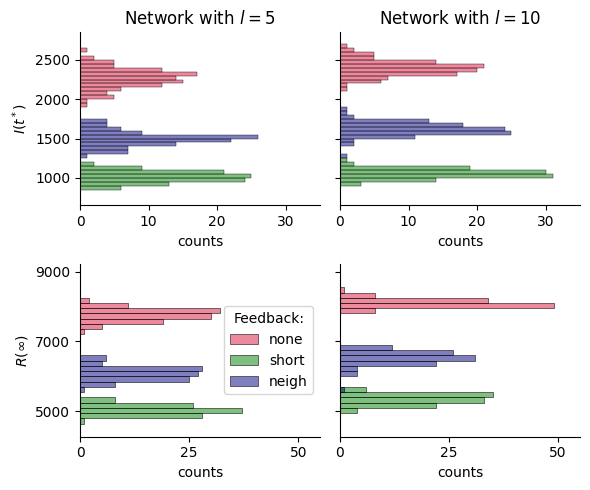

In [21]:
data = [data5,data10]

fig, axs = plt.subplots(2, 2, figsize=(6,5), sharey="row")
mycolors = ["crimson","g","navy"]
bins = [np.linspace(750,2750,41),np.linspace(4500,9000,31)]
for i,df in enumerate(data):
    for j,comp in enumerate(["I","R"]):
        none = df.xs(("none","none","none"),level=(0,1,2)).xs(comp,axis=1,level="compartment")
        sliced = df.xs(("soften","fixed"),level=("reaction","fear")).xs(comp,axis=1,level="compartment")
        short = sliced.xs("short",level="feedback")
        neighbours = sliced.xs("neighbours",level="feedback")
        if comp == "I":
            sb.histplot(y=none.apply(np.max), bins=bins[j], color=mycolors[0], alpha=0.5, label="none", ax=axs[j,i])
            sb.histplot(y=short.apply(np.max), bins=bins[j], color=mycolors[1], alpha=0.5, label="short", ax=axs[j,i])
            sb.histplot(y=neighbours.apply(np.max), bins=bins[j], color=mycolors[2], alpha=0.5, label="neigh", ax=axs[j,i])
        elif comp == "R":
            sb.histplot(y=none.iloc[-1], bins=bins[j], color=mycolors[0], alpha=0.5, label="none", ax=axs[j,i])
            sb.histplot(y=short.iloc[-1], bins=bins[j], color=mycolors[1], alpha=0.5, label="short", ax=axs[j,i])
            sb.histplot(y=neighbours.iloc[-1], bins=bins[j], color=mycolors[2], alpha=0.5, label="neigh", ax=axs[j,i])

axs[0,0].set_title(r"Network with $l=5$")
axs[0,1].set_title(r"Network with $l=10$")

axs[0,0].set_ylabel(r"$I(t^*)$")
axs[0,0].set_yticks(np.linspace(1000,2500,4))

axs[1,0].set_ylabel(r"$R(\infty)$")
axs[1,0].set_yticks(np.linspace(5000,9000,3))
axs[1,0].legend(loc="center right", title="Feedback:")

for ax in axs.flatten():
    ax.set_xlabel("counts")
    ax.spines[["top","right"]].set_visible(False)
for ax in axs[0]:
    ax.set_xticks(np.linspace(0,30,4))
    ax.set_xlim([0,35])
for ax in axs[1]:
    ax.set_xticks(np.linspace(0,50,3))
    ax.set_xlim([0,55])

fig.tight_layout()

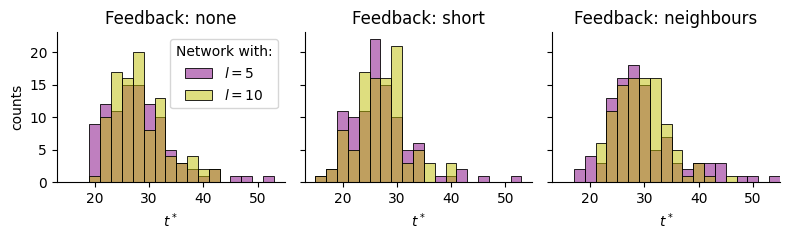

In [23]:
data = [data5,data10]

fig, axs = plt.subplots(1, 3, figsize=(8,2.5), sharey=True)
mycolors = ["purple","y"]
datalab = [r"$l=$"+str(n) for n in [5,10]]
bins = np.linspace(15,55,21)
for i,df in enumerate(data):
    none = df.xs(("none","none","none"),level=[0,1,2]).xs("I",axis=1,level="compartment")
    sliced = df.xs(("soften","fixed"),level=("reaction","fear")).xs("I",axis=1,level="compartment")
    short = sliced.xs("short",level="feedback")
    neighbours = sliced.xs("neighbours",level="feedback")
    sb.histplot(x=none.index[none.apply(np.argmax).to_numpy()], bins=bins, color=mycolors[i], alpha=0.5, label=datalab[i], ax=axs[0])
    sb.histplot(x=short.index[short.apply(np.argmax).to_numpy()], bins=bins, color=mycolors[i], alpha=0.5, label=datalab[i], ax=axs[1])
    sb.histplot(x=neighbours.index[neighbours.apply(np.argmax).to_numpy()], bins=bins, color=mycolors[i], alpha=0.5, label=datalab[i], ax=axs[2])

axs[0].set_title("Feedback: none")
axs[1].set_title("Feedback: short")
axs[2].set_title("Feedback: neighbours")
axs[0].set_ylabel("counts")
axs[0].legend(title="Network with:")
for ax in axs:
    ax.set_xlabel(r"$t^*$")
    ax.set_xticks(np.linspace(20,50,4))
    ax.set_xlim([13,55])
    ax.spines[["top","right"]].set_visible(False)

fig.tight_layout()